# Regresión Lineal: Predicción de Precios de Autos

Una tarea bastante común en el contexto de Machine Learning es la predicción de una variable según algunos descriptores. En esta ocasión partiremos de un dataset que involucra ocho variables (algunas numéricas, otras categóricas) y el precio de un automóvil, el cual se desea estimar empleando un modelo de regresión lineal.

El objetivo de este cuaderno es que usted aprenda:
- Algunas maneras de lidiar con descriptores categóricos no-numéricos.
- Uso de la librería Pandas para manejar datos tabulares en formato .csv.
- Uso de la librería Scikit Learn para preprocesamiento y entrenamiento de un modelo de regresión lineal.
- Funcionamiento e implementación del algoritmo Descenso de Gradiente Estocástico para un modelo lineal básico.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.




In [1]:
import sys
sys.executable

'c:\\Users\\Diego\\miniconda3\\python.exe'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from numpy.linalg import eig

ModuleNotFoundError: No module named 'numpy'

In [2]:
df = pd.read_csv('carDataset/toyota.csv')
df.head()

NameError: name 'pd' is not defined

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Podemos observar algunas categorías numéricas, y otras de tipo _object_ (string).

In [41]:
categ = ['model','year','transmission','fuelType','engineSize']
str_categ = ['model','transmission','fuelType']
numer = ['price','mileage','tax','mpg']

## Parte 1

A continuación se realizó el ajuste de los datos para un modelo de regresión lineal definido mediante la librería SciKit-Learn. Se observan dos métricas de precisión, en este caso Error Cuadrático Medio (RMSE) y $R^2$ (puede leer más sobre esta métrica en [ScikitLearn: r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)). Se le entregarán los dos primeros casos como ejemplo, usted debe implementar los demás a partir de estos primeros.

#### Casos:

- Caso 1: Codificación One-Hot (MinMaxScaler)
- Caso 2: Codificación Ordinal (MinMaxScaler)
- Caso 3: Codificación One-Hot (RobustScaler)
- Caso 4: Codificación Ordinal (RobustScaler)
- Caso 5: Entrenar con un 30% (Codificación Ordinal, MinMaxScaler)
- Caso 6: Entrenar con un 55% (Codificación Ordinal, MinMaxScaler)
- Caso 7: Entrenar con un 80% (Codificación Ordinal, MinMaxScaler)

Analice los resultados.

### Caso 1:

#### Codificación One-Hot

Una de las formas de codificar categorías no numéricas se conoce como _one-hot encoding_, en donde se crea una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0.

Igualmente, en este caso se realizará un escalamiento de los datos utilizando un `MinMaxScaler`, investigue más sobre esta función en: [ScikitLearn: MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [42]:
df_ohe = pd.get_dummies(df, drop_first=True)
scaler = MinMaxScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,...,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.818182,0.256150,0.138100,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.863636,0.256066,0.106716,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.772727,0.222301,0.157479,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.863636,0.306839,0.084476,0.265487,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.863636,0.281478,0.208019,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Separación de Datos

In [43]:
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

model_1.fit(X_train, y_train)
preds = model_1.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_1.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.031
R^2: 0.917



In [45]:
print(model_1.intercept_)
print(model_1.coef_)

-0.10356586097064832
[ 2.93044329e-01 -1.80914637e-01 -3.63399738e-02 -4.76596267e-02
  2.01511773e-01  2.40529932e-02 -4.74052878e-02  9.22986143e-02
  1.17904894e-01  8.56146911e-02  1.12677574e-01  1.44169080e-01
 -5.09414539e-03  3.87046840e-01  2.42863892e-01  8.49738771e-02
  8.47652093e-02  5.20443061e-01 -8.23644698e-03  2.17436513e-02
  3.74026269e-03 -2.71502335e-02 -1.97419755e-02  1.30451205e-15
  2.02328571e-03  5.73121758e-02  4.66555696e-02  2.53887616e-02]


### Caso 2

#### Codificación Ordinal

In [46]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [47]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [48]:
model_2 = LinearRegression()

model_2.fit(X_train, y_train)
preds = model_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_2.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.787



### Caso 3

#### Codificación One-Hot

In [49]:
df_ohe3 = pd.get_dummies(df, drop_first=True)
scaler = RobustScaler()
df_scl_ohe3 = scaler.fit_transform(df_ohe3)
df_scl_ohe3 = pd.DataFrame(df_scl_ohe3, columns = df_ohe.columns)
df_scl_ohe3.head()

,year,price,mileage,tax,mpg,engineSize,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,...,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.5,0.776286,0.257936,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.775541,0.004718,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,0.477703,0.414289,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.223415,-0.174718,0.103448,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.999702,0.822056,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Separación de Datos

In [50]:
X = df_scl_ohe3.drop(['price'], axis=1)
y = df_scl_ohe3['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [51]:
model_3 = LinearRegression()

model_3.fit(X_train, y_train)
preds = model_3.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_3.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.277
R^2: 0.917



### Caso 4

#### Codificación Ordinal

In [52]:
oe4 = OrdinalEncoder()
df_oe4 = df.copy()
df_oe4[str_categ] = oe4.fit_transform(df_oe[str_categ])

x = df_oe4.values #returns a numpy array
Rscaler = RobustScaler()
x_scaled = Rscaler.fit_transform(x)
df_scl_oe4 = pd.DataFrame(x_scaled, columns=df_oe4.columns)
df_scl_oe4.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.066667,-0.5,0.776286,0.0,0.257936,0.0,0.896552,-1.955882,0.625
1,0.066667,0.0,0.775541,0.0,0.004718,0.0,0.068966,-1.955882,0.625
2,0.066667,-1.0,0.477703,0.0,0.414289,0.0,0.896552,-1.955882,0.625
3,0.066667,0.0,1.223415,0.0,-0.174718,0.0,0.103448,-1.955882,0.625
4,0.066667,0.0,0.999702,0.0,0.822056,0.0,0.068966,-1.955882,0.625


#### Separación de Datos

In [53]:
X = df_scl_oe4.drop(['price'], axis=1)
y = df_scl_oe4['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


In [54]:
model_4 = LinearRegression()

model_4.fit(X_train, y_train)
preds = model_4.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_4.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.444
R^2: 0.787



### Caso 5

#### Codificación Ordinal

In [55]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']


#### Separación de Datos

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=22)



In [57]:
model_2 = LinearRegression()

model_2.fit(X_train, y_train)
preds = model_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_2.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.049
R^2: 0.785



### Caso 6

#### Codificación Ordinal

In [58]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']


#### Separación de Datos

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=22)

In [60]:
model_2 = LinearRegression()

model_2.fit(X_train, y_train)
preds = model_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_2.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.784



### Caso 7

#### Codificación Ordinal

In [61]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']

#### Separación de Datos

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [63]:
model_2 = LinearRegression()

model_2.fit(X_train, y_train)
preds = model_2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_2.score(X_test, y_test)
print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.05
R^2: 0.787



## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico. Para esta ocasión debe utilizar una codificación One-Hot, un RobustScaler y realizar el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista `errores` se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

In [227]:
df_ohe = pd.get_dummies(df, drop_first=True)
scaler = RobustScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)

X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


# ya está creada la variable cte=1 
#X_train['Cte'] = np.ones((X_train.shape[0]), dtype=int)
#X_test['Cte'] = np.ones((X_test.shape[0]), dtype=int)

X_train

,year,mileage,tax,mpg,engineSize,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,...,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
856,-1.5,0.834592,-0.724138,-0.544118,-0.250,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0
4709,-1.0,0.808919,-0.931034,0.455882,-0.625,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2028,0.5,-0.178464,0.068966,-0.198529,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0
3295,0.5,0.044686,0.068966,-0.772059,-0.375,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
924,0.0,0.035711,0.068966,-0.463235,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,0.0,-0.159036,0.068966,0.455882,-0.625,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356,1.0,-0.531785,0.000000,-0.970588,1.250,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,-1.0
4908,-0.5,0.210059,-0.931034,0.455882,-0.625,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6276,0.0,0.966289,-0.931034,2.301471,0.375,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,-1.0


In [228]:
# crear el predictor cte=1 
X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values]
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values



#Inicialización de w: vector de estimadores de modelo
w0 = np.random.random(X_train_array.shape[1])
#w0 = w0.transpose()
w = w0.copy() #Selección de par aleatorio
w_ant=w0
eps = 1e-3 # Se define un criterio de parada basado en el error en la predicción #
error = float('inf') # Valor inicial, se debe actualizar en cada iteración #
dif = float('inf') # Diferencia entre vectores de pesos w consecutivos #

xtx= np.dot(X_train_array.transpose(), X_train_array)
vp = np.linalg.eigvals(xtx)


max_vp = np.sqrt(max(vp))
print(max_vp)

#Inicialización de valor de la tasa de aprendizaje 
tasa = (2/max_vp)-0.001 # Selección de tasa de aprendizaje #
#Lista para monitorear aprendizaje
errores = [] # Agregar a esta lista los valores de la función de error en cada iteración #
errores.append(10)

#Numero de iteraciones
n=0

#dif=10
#eps=0

while dif >eps:
    
    # crear el punto aleatorio
    i = np.random.randint(X_train_array.shape[0])
    xActual = X_train_array[i] #X_train_array[i]
    yActual = y_train_array[i]
    
    # calcular gradiente: derivada de la función de Error de Minimos Cuadrados
    gradiente = np.dot(w, xActual)
    
    # error: diferencia entre yi observado, yi^ predicho
    error = gradiente-yActual
    errores.append(error)
    
    # w_k+1 = w_k-tasa*error*xActual
    w = w_ant-tasa*error*xActual
    dif = np.abs(errores[-1]-errores[-2])
    w_ant = w 
    n+=1
    #print(dif)
    #eps+=1

print("El número de iteraciones en las que convergió el algorimto de Gradiente Descendente Estocástico es: "+str(n)) 
print("La diferencia de errores en la última iteración es: "+ str(dif))
x = pd.DataFrame(X_train_array)
x

111.4595786394685
El número de iteraciones en las que convergió el algorimto de Gradiente Descendente Estocástico es: 474
La diferencia de errores en la última iteración es: 0.00037170995475310775


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,-1.5,0.834592,-0.724138,-0.544118,-0.250,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,-1.0,0.808919,-0.931034,0.455882,-0.625,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.5,-0.178464,0.068966,-0.198529,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.5,0.044686,0.068966,-0.772059,-0.375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.035711,0.068966,-0.463235,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5385,1.0,0.0,-0.159036,0.068966,0.455882,-0.625,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5386,1.0,1.0,-0.531785,0.000000,-0.970588,1.250,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,-1.0
5387,1.0,-0.5,0.210059,-0.931034,0.455882,-0.625,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5388,1.0,0.0,0.966289,-0.931034,2.301471,0.375,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,-1.0


# Gradiente Descendente Mini-batch n=590

In [233]:
df_ohe = pd.get_dummies(df, drop_first=True)
scaler = RobustScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)

X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


# ya está creada la variable cte=1 
#X_train['Cte'] = np.ones((X_train.shape[0]), dtype=int)
#X_test['Cte'] = np.ones((X_test.shape[0]), dtype=int)
X_train

,year,mileage,tax,mpg,engineSize,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,...,model_ Urban Cruiser,model_ Verso,model_ Verso-S,model_ Yaris,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
856,-1.5,0.834592,-0.724138,-0.544118,-0.250,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0
4709,-1.0,0.808919,-0.931034,0.455882,-0.625,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2028,0.5,-0.178464,0.068966,-0.198529,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0
3295,0.5,0.044686,0.068966,-0.772059,-0.375,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
924,0.0,0.035711,0.068966,-0.463235,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,0.0,-0.159036,0.068966,0.455882,-0.625,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356,1.0,-0.531785,0.000000,-0.970588,1.250,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,-1.0
4908,-0.5,0.210059,-0.931034,0.455882,-0.625,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6276,0.0,0.966289,-0.931034,2.301471,0.375,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,-1.0


In [259]:
X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values]
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values


# crear el mini-batch sobre el X_train
df_mini = pd.DataFrame(X_train_array)
df_mini = df_mini.sample(n=32)
df_mini_array = df_mini.to_numpy()


#Inicialización de w: vector de estimadores de modelo
w0 = np.random.random(X_train_array.shape[1])
#w0 = w0.transpose()
w = w0.copy() #Selección de par aleatorio
w_ant=w0
eps = 1e-3 # Se define un criterio de parada basado en el error en la predicción #
error = float('inf') # Valor inicial, se debe actualizar en cada iteración #
dif = float('inf') # Diferencia entre vectores de pesos w consecutivos #

xtx= np.dot(df_mini_array.transpose(), df_mini_array)
vp = np.linalg.eigvals(xtx)


max_vp = np.sqrt(max(vp))
print(max_vp)

#Inicialización de valor de la tasa de aprendizaje 
tasa = (2/max_vp)-0.001 # Selección de tasa de aprendizaje #
#Lista para monitorear aprendizaje
errores = [] # Agregar a esta lista los valores de la función de error en cada iteración #
errores.append(100000000)

#Numero de iteraciones
n=0

#dif=10
#eps=0

while dif >eps:
    
    # crear el punto aleatorio
    i = np.random.randint(X_train_array.shape[0])
    xActual = X_train_array[i] #X_train_array[i]
    yActual = y_train_array[i]
    
    # calcular gradiente: derivada de la función de Error de Minimos Cuadrados
    gradiente = np.dot(w, xActual)
    
    # error: diferencia entre yi observado, yi^ predicho
    error = gradiente-yActual
    errores.append(error)
    
    # w_k+1 = w_k-tasa*error*xActual
    w = w_ant-tasa*error*xActual
    dif = np.abs(errores[-1]-errores[-2])
    w_ant = w 
    n+=1
    #print(dif)
    #eps+=1

print("El número de iteraciones en las que convergió el algorimto de Gradiente Descendente Estocástico es: "+str(n)) 
print("La diferencia de errores en la última iteración es: "+ str(dif))
#df_mini

index_list = df_mini.index.values.tolist()
xtx

8.304472082672573
El número de iteraciones en las que convergió el algorimto de Gradiente Descendente Estocástico es: 56991
La diferencia de errores en la última iteración es: nan


C:\Users\Diego\AppData\Local\Temp/ipykernel_21364/1914280549.py:56: RuntimeWarning: invalid value encountered in multiply
  w = w_ant-tasa*error*xActual


array([[ 32.        ,   4.5       ,   4.13646194,  -8.5862069 ,
         -1.21323529,   5.25      ,   1.        ,   7.        ,
          2.        ,   0.        ,   2.        ,   1.        ,
          0.        ,   0.        ,   1.        ,   0.        ,
          1.        ,   5.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   9.        , -14.        ,
          0.        ,   2.        ,  11.        ,   0.        ,
        -15.        ],
       [  4.5       ,  11.25      ,  -7.88317471,   2.18965517,
         -5.24632353,   1.9375    ,   0.5       ,   0.        ,
          0.        ,   0.        ,   2.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         -0.5       ,  -0.5       ,   0.        ,   0.        ,
         -0.5       ,   0.        ,   3.5       ,  -2.        ,
          0.        ,   0.        ,   2.        ,   0.        ,
         -0.5       ],
       [  4.13646194,  -7.88317471,  21.33206588,  -1.7116

#### Evaluación de Modelo

In [229]:
# crear vector de predicciones yi^ 
y_train_preds = np.zeros(y_train_array.shape)

# calcular el vector de predicciones yi^ en train-set
w = np.asarray(w)
X_train_array = np.asarray(X_train_array)

for i in range(X_train_array.shape[0]):
    y_train_preds[i] = np.dot(w,X_train_array[i])

y_test_preds = np.zeros(y_test_array.shape)

# calcular el vector de predicciones yi^ en test-set
for i in range(X_test_array.shape[0]):
    y_test_preds[i] = np.dot(w,X_test_array[i])
    
r2_train = r2_score(y_train_array, y_train_preds)
r2_test = r2_score(y_test_array, y_test_preds)
print(f'R2 entrenamiento: {round(r2_train,4)}\nR2 prueba: {round(r2_test,4)}')

R2 entrenamiento: 0.8117
R2 prueba: 0.8043


## Gráfica de Resultados

Text(0.5, 1.0, 'Descenso de Gradiente Estocástico')

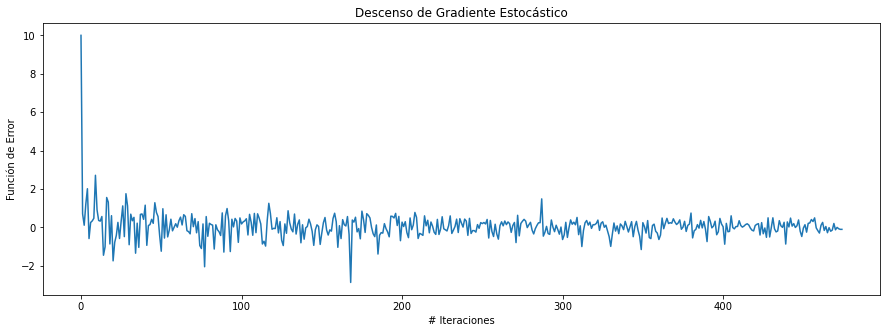

In [230]:
plt.figure(figsize=(15,5))
plt.plot(errores)
plt.xlabel('# Iteraciones')
plt.ylabel('Función de Error')
plt.title('Descenso de Gradiente Estocástico')